In [1]:
import tensorflow as tf 

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/3
60000/60000 [==============================] - 14s 238us/sample - loss: 0.2687 - acc: 0.9218
Epoch 2/3
60000/60000 [==============================] - 7s 120us/sample - loss: 0.1127 - acc: 0.9654
Epoch 3/3
10000/10000 [==============================] - 1s 67us/sample - loss: 0.1046 - acc: 0.9675
0.10460595013890416
0.9675


In [2]:
model.save('epic_num_reader.model')

In [3]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
predictions = new_model.predict(x_test)

In [5]:
print(predictions)

[[1.21945538e-06 2.49987728e-08 2.51696874e-05 ... 9.99924898e-01
  1.42572645e-07 7.06391847e-06]
 [9.42593203e-09 1.29137070e-05 9.99984741e-01 ... 4.72939576e-10
  3.09330574e-07 3.84009908e-13]
 [3.39934263e-06 9.90038276e-01 2.24015515e-04 ... 1.79054227e-03
  5.44114830e-03 1.89540278e-05]
 ...
 [2.37512072e-08 1.09277444e-07 8.90439793e-08 ... 1.72896998e-05
  2.44144485e-05 1.35903538e-04]
 [9.83623281e-08 2.97202067e-08 3.61389529e-10 ... 3.49531675e-08
  1.38878400e-04 2.89763609e-08]
 [7.49387766e-07 2.17795360e-07 1.33757712e-05 ... 8.40825365e-09
  8.22158881e-07 1.44878980e-08]]


In [6]:
import numpy as np

print(np.argmax(predictions[0]))

7


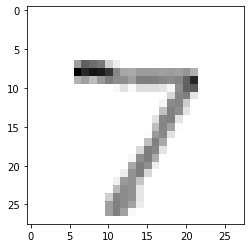

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()